# 一、Introduction

### 1.1什么是机器学习
- Supervised learning
- Unsupervised learning
- Reinforcement learning

### 1.2监督学习
用正确答案的训练集

回归Regression ：试着推测出这一系列连续值属(拟合成一个函数)

> 例子：预测房价

分类Classification：

> 例子：是否是恶性肿瘤

**支持向量机，能让计算机处理无限多个特征**
### 1.3无监督学习

聚类clustering

> 例子：Google news中同一事件的新闻词条

anomaly detection  发现错误的数据

dimensionality reduct 降维


# 二、 单变量线性回归

### 2.1 模型表示
我们将要用来描述这个回归问题的标记如下:

$m$   代表训练集中实例的数量

$x$    代表特征/输入变量

$y$    代表目标变量/输出变量

$\left( x,y \right)$    代表训练集中的实例

$({{x}^{(i)}},{{y}^{(i)}})$    代表第$i$ 个观察实例

$h$     代表学习算法的解决方案或函数也称为假设（**hypothesis**）

$\hat{y}$  预测值

<img src=images/p026.png>

单变量线性回归的表达方式为：$h_\theta \left( x \right)=\theta_{0} + \theta_{1}x$

### 2.2 代价函数（平方误差函数）
接下来我们会引入一些术语我们现在要做的便是为我们的模型选择合适的**参数**（**parameters**）$\theta_{0}$ 和 $\theta_{1}$

模型所预测的值与训练集中实际值之间的差距就是**建模误差**（**modeling error**）

目标： $minmize \quad J \left( \theta_0, \theta_1 \right) = \frac{1}{2m}\sum\limits_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right)^{2}$

（除以$2m$，使$J$不会随着训练样本的增大而急剧增大。之后又解释了为什么是2m而不是km（k是常数），目的是方便后面梯度下降求导时把2约去使式子看起来更简洁）

我们绘制一个等高线图，三个坐标分别为$\theta_{0}$和$\theta_{1}$ 和$J(\theta_{0}, \theta_{1})$：

<img src=images/p027.png>

则可以看出在三维空间中存在一个使得$J(\theta_{0}, \theta_{1})$最小的点

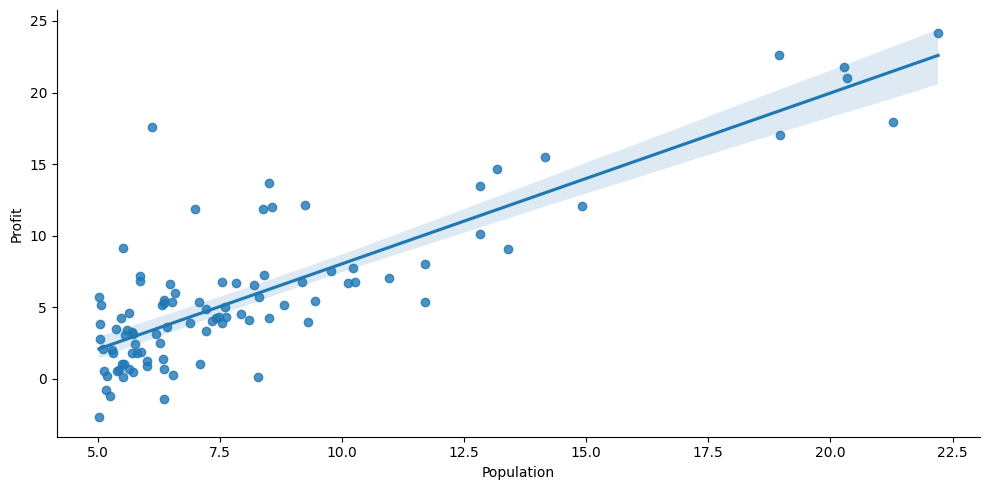

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('data/deeplearning.mplstyle')   ##可以更改代码风格

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

path =  'data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
#  data.head()  #data.describe()

### 代价函数
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

data.insert(0, 'Ones', 1)  ###在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度
### 初始化一些变量
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列
#X.head()#head()是观察前5行
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
# theta  #查看theta的属性   （1，2)矩阵

sns.lmplot(x="Population",y="Profit",
    data=data,
    #hue="Admitted",
    palette="husl",
    aspect=2)    ###长宽比

### 2.3 梯度下降

随机选择一个参数的组合$\left( {\theta_{0}},{\theta_{1}},......,{\theta_{n}} \right)$，计算代价函数，然后我们寻找下一个能让代价函数值下降最多的参数组合。我们持续这么做直到找到一个局部最小值（**local minimum**），不能保证它是全局最小值（**global minimum**）

<img src=images/p024.jpg>

批量梯度下降（**batch gradient descent**）算法的公式为：

repeat until convergence{
	$\theta_j=\theta_j-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J({{\theta }_{0}},{{\theta }_{1}})$
}

$\alpha$是学习率（**learning rate**），决定下降速率；各自计算，不断 **同时** 更新${\theta_{0}}$和${\theta_{1}}$ （如果先代入一个再计算，实际上是走歪了）

<img src=images/p025.png>


- 如果$a$太小了，可能会很慢，需要很多步才能到达全局最低点

- 如果$a$太大，那么梯度下降法可能会越过最低点，甚至可能无法收敛

当接近局部最低时，导数值会自动变得越来越小，所以梯度下降将自动采取较小的幅度，这就是梯度下降的做法。所以实际上没有必要再另外减小 $a$

对代价函数求导，可以将梯度算法改写成：

**Repeat {**

​                ${\theta_{0}}:={\theta_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{ \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}$

​                ${\theta_{1}}:={\theta_{1}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}^{(i)}} \right)}$

  **}**

In [2]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))   
        theta = temp
        cost[i] = computeCost(X, y, theta)   
    return theta, cost

alpha = 0.001
iters = 10000  ###迭代次数过少也会出现欠拟合或者过拟合的问题
g, cost = gradientDescent(X, y, theta, alpha, iters)
## 代价函数
computeCost(X, y, g)

4.516069827120197

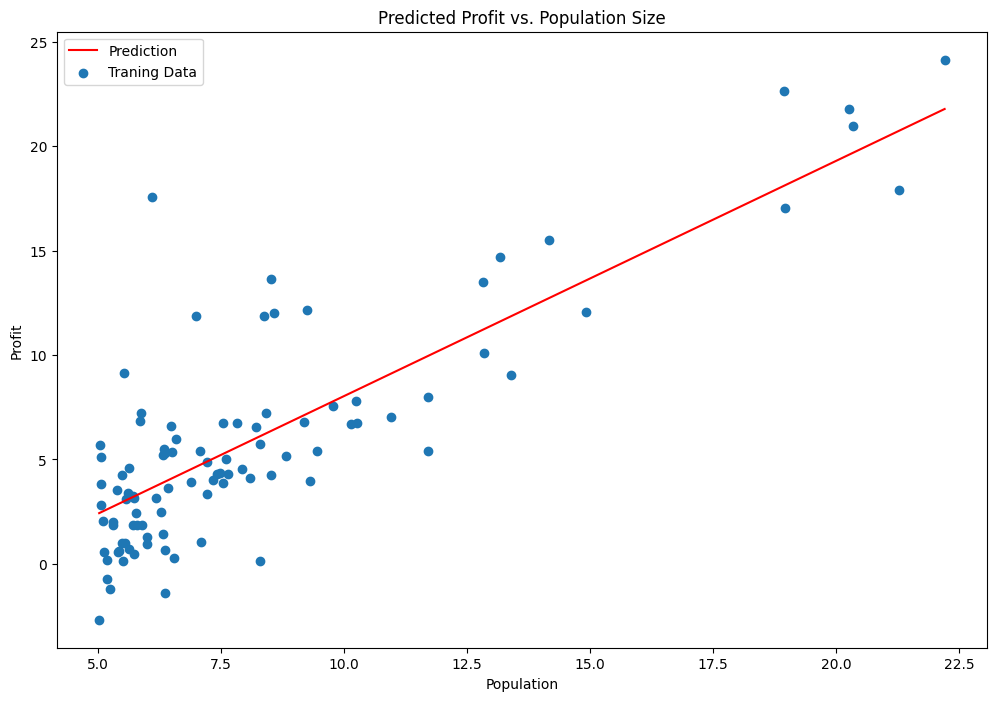

In [3]:
############ 拟合结果
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 三、 多变量线性回归

### 3.1 模型表示

$n$ 代表特征的数量

${x^{\left( i \right)}}$代表第 $i$ 个训练实例，是特征矩阵中的第$i$行，是一个**向量**（**vector**）

${x}_{j}^{\left( i \right)}$代表特征矩阵中第 $i$ 行的第 $j$ 个特征，也就是第 $i$ 个训练实例的第 $j$ 个特征

这个公式中有$n+1$个参数和$n$个变量：   $h_{\theta} \left( x \right)={\theta_{0}}{x_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}}+...+{\theta_{n}}{x_{n}}$ ，方便起见，令$x_0=1$, $h_{\theta}\left( x \right)={\theta_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}}+...+{\theta_{n}}{x_{n}}$，

此时模型中的参数是一个$n+1$维的向量，任何一个训练实例也都是$n+1$维的向量，特征矩阵$X$的维度是 $m*(n+1)$。 因此公式可以简化为：$h_{\theta} \left( x \right)={\theta^{T}}X$，其中上标$T$代表矩阵转置

```python
w = np.array([ , , , ])
x = np.array([ , , , ])
f = np.dot(w,x)+ f ###点乘，矢量化速度更快
```

### 3.2 代价函数

代价函数：$J\left( {\theta_{0}},{\theta_{1}}...{\theta_{n}} \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( h_{\theta} \left({x}^{\left( i \right)} \right)-{y}^{\left( i \right)} \right)}^{2}}}$ ，

其中：$h_{\theta}\left( x \right)=\theta^{T}X={\theta_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}}+...+{\theta_{n}}{x_{n}}$ ，

梯度下降(也是同时更新）：

repeat until convergence{
	$\theta_j=\theta_j-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J({{\theta }_{0}},{{\theta }_{1}},\theta_2,...,\theta_n)$
}

### 3.3 梯度下降法优化

#### 特征缩放

当变量都具有相近的尺度时梯度下降算法可以更快地收敛。

以房价问题为例，假设我们使用两个特征，房屋的尺寸和房间的数量，尺寸的值为 0-2000平方英尺，而房间数量的值则是0-5，以两个参数分别为横纵坐标，绘制代价函数的等高线图能，看出图像会显得很扁，梯度下降算法需要非常多次的迭代才能收敛。

<img src=images/p023.jpg>

解决的方法是尝试将所有特征的尺度都尽量缩放到-1到1之间

**mean normalization**:  $${{x}_{n}}=\frac{{{x}_{n}}-\mu }{{{x}_{\max }}-{{x}_{\min }}}$$

**z-score normalization**：${{x}_{n}}=\frac{{{x}_{n}}-\mu }{\sigma }$，其中 $\mu$是平均值，$\sigma$是标准差

#### 学习率 $\alpha$

learning graph

<img src=images/p022.jpg>

自动测试是否收敛: 将代价函数的变化值与某个阀值（例如0.001）进行比较

如果学习率$a$过小，则达到收敛所需的迭代次数会非常高；如果学习率$a$过大，每次迭代可能不会减小代价函数，可能会越过局部最小值导致无法收敛

通常可以考虑尝试些学习率：$\alpha=0.001，0.03，0.1，0.3，1，3，10$  (每次×3)

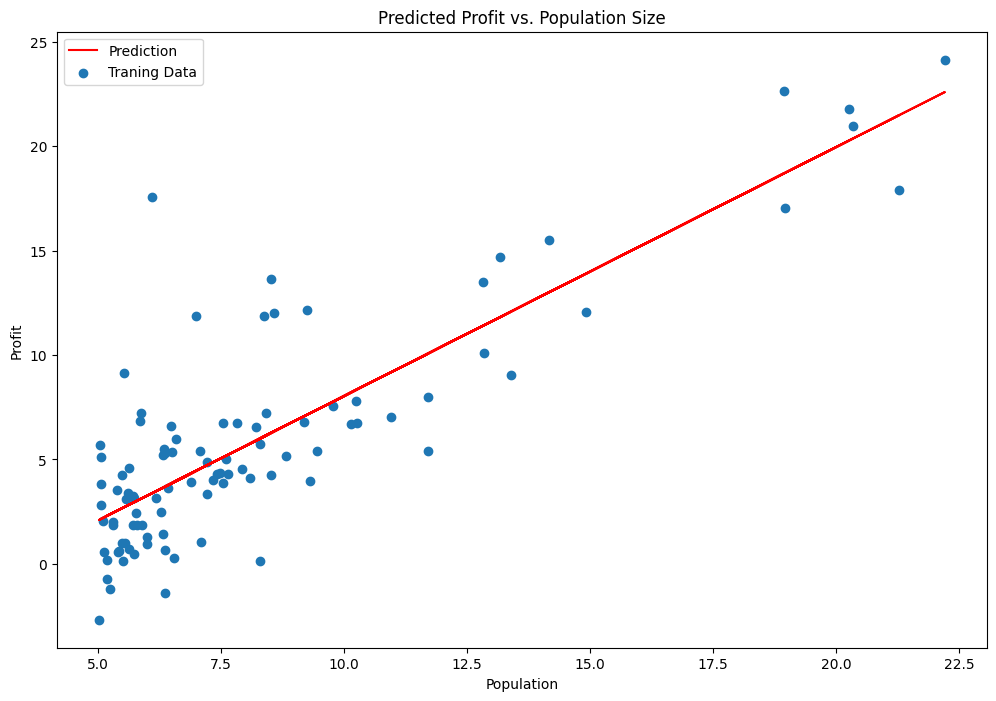

In [4]:
### 2个变量（房子的大小，卧室的数量）和目标（房子的价格）进行回归预测
path =  'data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
############################  特征归一化
data2 = (data2 - data2.mean()) / data2.std()
############################  重复第1部分的预处理步骤，并对新数据集运行线性回归程序
# add ones column
data2.insert(0, 'Ones', 1)
# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]
# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
# get the cost (error) of the model
computeCost(X2, y2, g2)
#可以看到代价函数的下降过程
#fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(np.arange(iters), cost2, 'r')
#ax.set_xlabel('Iterations')
#ax.set_ylabel('Cost')
#plt.show()  
#### 使用sklearn库自带的最小二乘
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()


### 3.4 多项式回归

二次方模型：$h_{\theta}\left( x \right)={\theta_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}^2}$或三次方模型： $h_{\theta}\left( x \right)={\theta_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}^2}+{\theta_{3}}{x_{3}^3}$ 

${{x}_{2}}=x_{2}^{2},{{x}_{3}}=x_{3}^{3}$，从而将模型转化为线性回归模型，方法同线性回归

注：尤其**注意特征缩放**

### 3.5 正规方程

求解：$\frac{\partial}{\partial{\theta_{j}}}J\left( {\theta_{j}} \right)=0$  使得代价函数最小

$J(\theta )=\frac{1}{2}{{\left( X\theta -y\right)}^{2}}$ ，其中$X$为$m$行$n$列的矩阵（$m$为样本个数，$n$为特征个数），$\theta$为$n$行1列的矩阵，$y$为$m$行1列的矩阵，对$J(\theta )$进行    
$J(\theta)=\frac{1}{2}{{\left(X\theta -y\right)}^{T}}\left( X\theta -y \right)$
$=\frac{1}{2}\left( {{\theta }^{T}}{{X}^{T}}-{{y}^{T}} \right)\left(X\theta -y \right)$
$=\frac{1}{2}\left( {{\theta }^{T}}{{X}^{T}}X\theta -{{\theta}^{T}}{{X}^{T}}y-{{y}^{T}}X\theta -{{y}^{T}}y \right)$

**求导法则**:

$\frac{dAB}{dB}={{A}^{T}}$ 

$\frac{d{{X}^{T}}AX}{dX}=2AX$                            

所以有:

$\frac{\partial J\left( \theta  \right)}{\partial \theta }=\frac{1}{2}\left(2{{X}^{T}}X\theta -{{X}^{T}}y -{}({{y}^{T}}X )^{T}-0 \right)$
$=\frac{1}{2}\left(2{{X}^{T}}X\theta -{{X}^{T}}y -{{X}^{T}}y -0 \right)$      $={{X}^{T}}X\theta -{{X}^{T}}y$

令$\frac{\partial J\left( \theta  \right)}{\partial \theta }=0$,   则有$\theta ={{\left( {X^{T}}X \right)}^{-1}}{X^{T}}y$

训练集特征矩阵为 $X$（包含了 ${{x}_{0}}=1$）并且我们的训练集结果为向量 $y$，则利用正规方程解出向量 $\theta ={{\left( {X^T}X \right)}^{-1}}{X^{T}}y$ 。设矩阵$A={X^{T}}X$，则：${{\left( {X^T}X \right)}^{-1}}={A^{-1}}$ 。对于那些不可逆的矩阵（通常是因为特征之间不独立，也有可能是特征数量大于训练集的数量），正规方程方法不能用

| 梯度下降                      | 正规方程                                                     |
| ----------------------------- | ------------------------------------------------------------ |
| 需要选择学习率$\alpha$        | 不需要                                                       |
| 需要多次迭代                  | 一次运算得出                                                 |
| 当特征数量$n$大时也能较好适用 | 需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$ 如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O\left( {{n}^{3}} \right)$，通常来说当$n$小于10000 时还是可以接受的 |
| 适用于各种类型的模型          | 只适用于线性模型，不适合逻辑回归模型等其他模型               |

正规方程的**python**实现：

```python
def normalEqn(X, y): 
   theta = np.linalg.inv(X.T@X)@X.T@y   #X.T@X等价于X.T.dot(X)
   return theta
```



In [5]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y  
    return theta
final_theta2=normalEqn(X, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])